## Imports

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [26]:
credit_df = pd.read_csv('data/desafio 1/conjunto_de_treinamento.csv')
credit_df

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,presencial,1,M,85,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,600.0,600.0,0
1,2,1,25,internet,1,F,38,1,0,0,...,N,,0,2.0,5.0,NaN,NaN,492.0,492.0,0
2,3,1,20,internet,1,F,37,2,0,0,...,N,,0,NaN,NaN,NaN,NaN,450.0,450.0,1
3,4,1,20,internet,1,M,37,1,1,0,...,Y,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1
4,5,7,1,internet,1,F,51,1,3,0,...,N,,0,9.0,5.0,NaN,NaN,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,10,presencial,1,M,27,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,308.0,308.0,0
19996,19997,1,20,presencial,1,F,26,2,1,0,...,N,,0,9.0,2.0,0.0,0.0,639.0,639.0,0
19997,19998,1,10,internet,1,F,63,2,0,0,...,N,,0,9.0,1.0,NaN,NaN,486.0,486.0,0
19998,19999,1,5,internet,1,F,84,1,0,0,...,N,,0,NaN,NaN,NaN,NaN,590.0,590.0,0


In [48]:
credit_df.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

### Análise por idade

In [28]:
len(credit_df['idade'].unique().tolist())

84

In [30]:
credit_df.groupby('idade').size()

idade
7        1
17       7
18     265
19     260
20     293
      ... 
95       4
96       2
97       1
100      1
106      2
Length: 84, dtype: int64

In [40]:
credit_df['idade_bin'] = pd.cut(
    credit_df['idade'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])


x = credit_df.groupby(['idade_bin', 'inadimplente']).size().to_frame().reset_index()

x

,idade_bin,inadimplente,0
0,"(0, 10]",0,0
1,"(0, 10]",1,1
2,"(10, 20]",0,289
3,"(10, 20]",1,536
4,"(20, 30]",0,1774
5,"(20, 30]",1,2315
6,"(30, 40]",0,2411
7,"(30, 40]",1,2697
8,"(40, 50]",0,2273
9,"(40, 50]",1,2164


<AxesSubplot:xlabel='idade_bin', ylabel='0'>

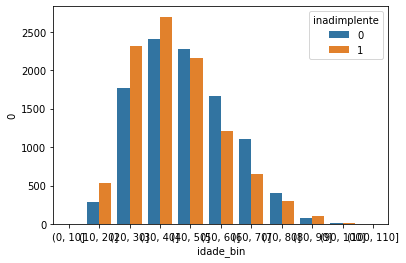

In [41]:

sns.barplot(x='idade_bin', y=0, hue='inadimplente', data=x)

### Análise vencimento

In [42]:
credit_df['dia_vencimento'].unique()

array([10, 25, 20,  1, 15,  5])

<AxesSubplot:xlabel='dia_vencimento', ylabel='0'>

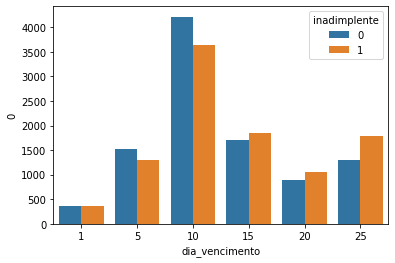

In [44]:
x = credit_df.groupby(['dia_vencimento', 'inadimplente']).size().to_frame().reset_index()

sns.barplot(x='dia_vencimento', y=0, data=x, hue='inadimplente')

<AxesSubplot:xlabel='qtde_dependentes', ylabel='0'>

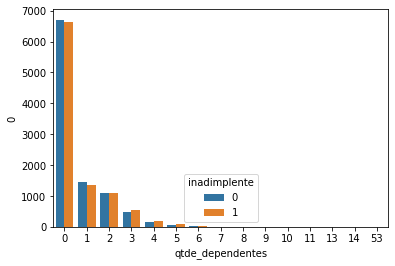

In [47]:
x = credit_df.groupby(['qtde_dependentes', 'inadimplente']).size().to_frame().reset_index()

sns.barplot(x='qtde_dependentes', y=0, data=x, hue='inadimplente')

In [53]:
def plot_inadimplente_analysis(col):
    print('\n')
    print(col)
    x = credit_df.groupby([col, 'inadimplente']).size().to_frame().reset_index()

    sns.barplot(x=col, y=0, data=x, hue='inadimplente')
    plt.show()
    



dia_vencimento


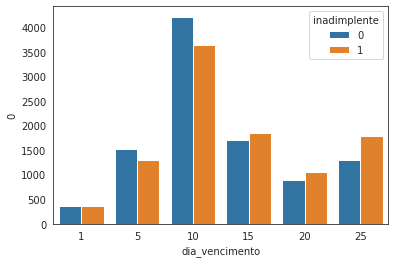



forma_envio_solicitacao


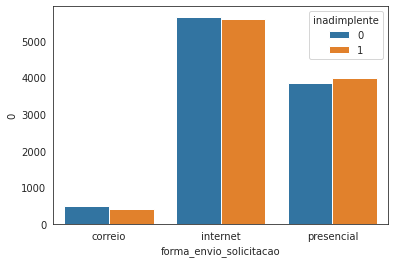



tipo_endereco


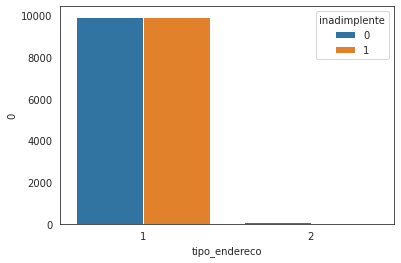



sexo


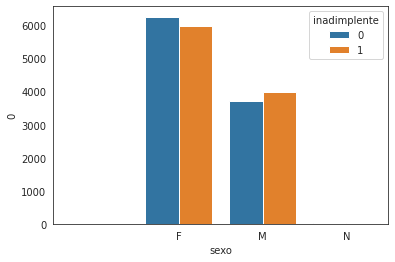



idade


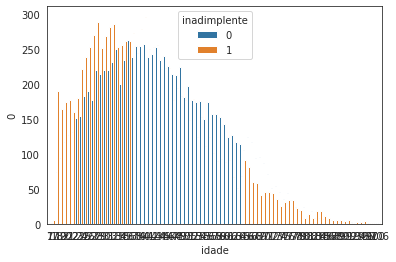



estado_civil


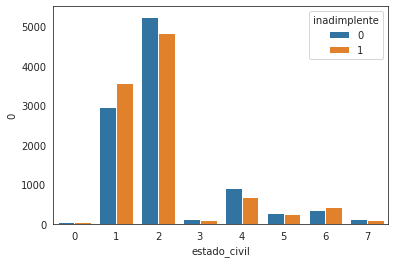



qtde_dependentes


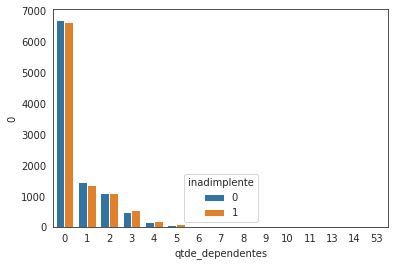



grau_instrucao


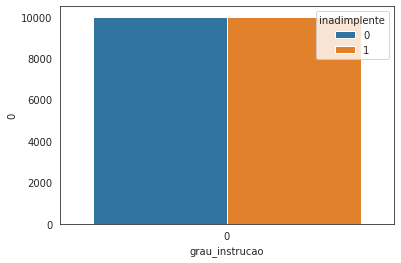



nacionalidade


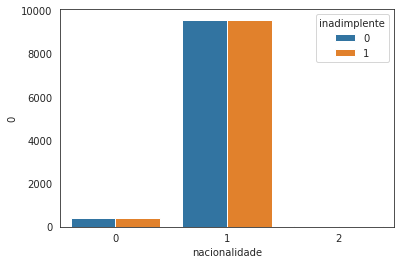



estado_onde_nasceu


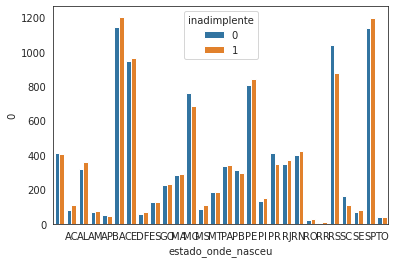



estado_onde_reside


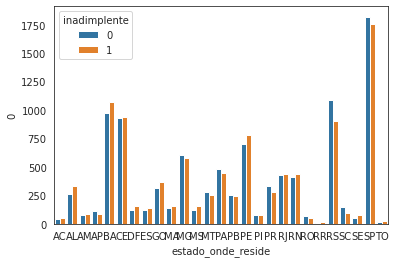



possui_telefone_residencial


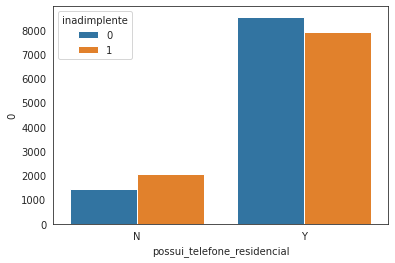



codigo_area_telefone_residencial


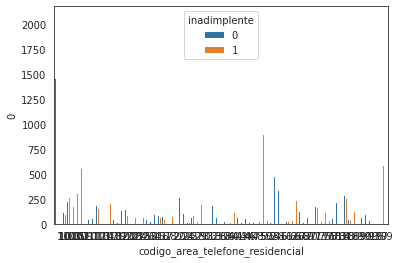



tipo_residencia


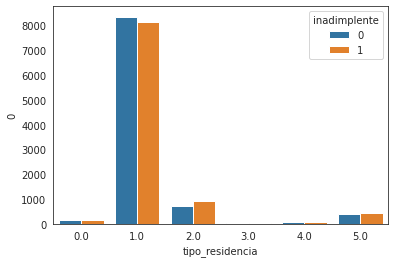



meses_na_residencia


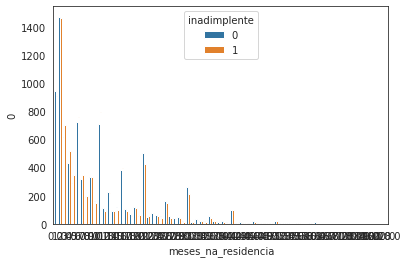



possui_telefone_celular


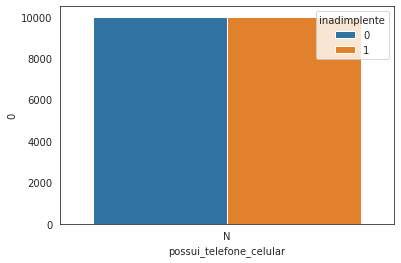



possui_email


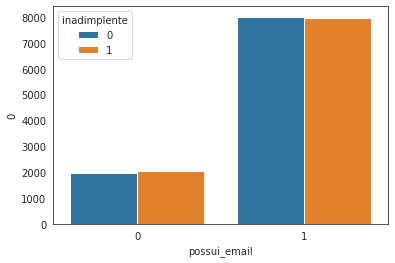



renda_mensal_regular


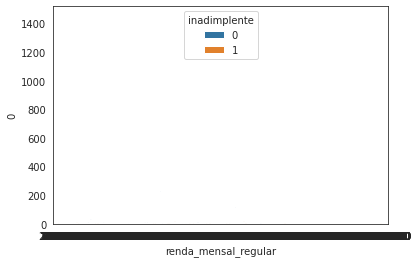



renda_extra


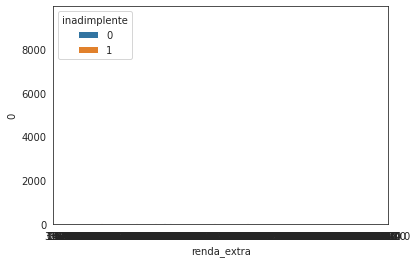



possui_cartao_visa


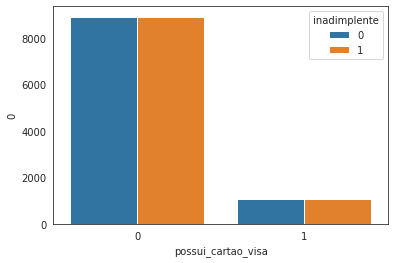



possui_cartao_mastercard


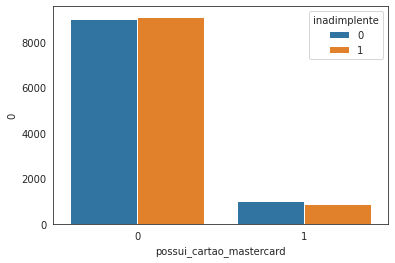



possui_cartao_diners


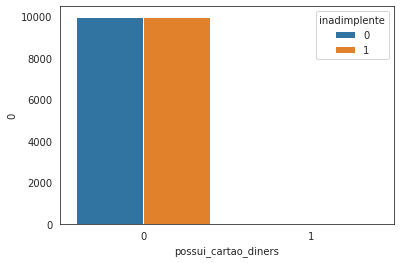



possui_cartao_amex


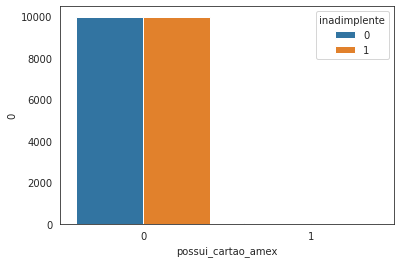



possui_outros_cartoes


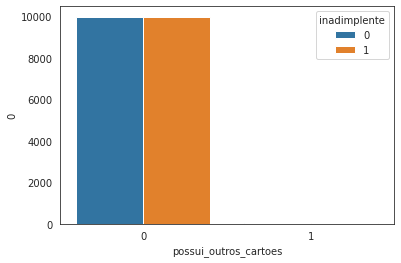



qtde_contas_bancarias


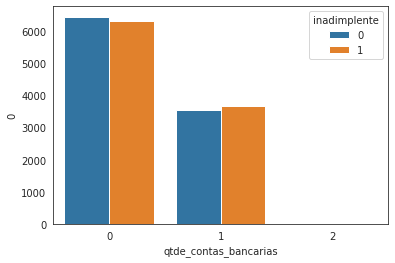



qtde_contas_bancarias_especiais


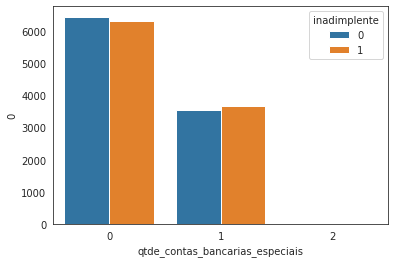

In [55]:
sns.set_style('white')

cols = ['dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo',
       'estado_civil', 'possui_telefone_residencial',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais']

for col in cols:
    plot_inadimplente_analysis(col)